<a href="https://colab.research.google.com/github/pratimdas/googlecolab/blob/main/AlgoLabs_Demo_MarketingFunnel_Dashboard_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Cell: Install Required Libraries
# This cell installs the libraries needed for data manipulation, visualization,
# interactive controls, and future PDF export functionalities.
!pip install pandas numpy matplotlib ipywidgets fpdf

print("Libraries installed: pandas, numpy, matplotlib, ipywidgets, fpdf")


Libraries installed: pandas, numpy, matplotlib, ipywidgets, fpdf


# 2. Prompt for LLM
Write a Google Colab cell that:
1. Asks the user if they want to:
   - Use previously generated data (if available)
   - Generate a new dataset
   - Specify the number of rows for the dataset
2. Generates a **synthetic dataset** simulating **aggregated marketing funnel data** including:
   - **Date (YYYY-MM-DD)**
   - **Region (e.g., North America, EMEA, APAC)**
   - **Product Category (e.g., Cloud Storage, AI Services, Security)**
   - **Marketing-Influenced Revenue**
   - **Customer Acquisition Cost (CAC)**
   - **Return on Marketing Investment (ROMI)**
   - **Customer Lifetime Value (CLV)**
   - **Marketing Qualified Leads (MQLs)**
   - **MQL to SQL Conversion Rate**
3. Ensures data distributions align with realistic business scenarios.
4. Prints a preview of the generated dataset.


In [14]:
# Cell: Data Loading/Generation for Aggregated Marketing Funnel Data
# This cell provides interactive controls to either:
# 1. Load previously generated data (by providing a file path)
# 2. Generate a new synthetic dataset based on the number of rows specified by the user.
#
# The synthetic dataset includes the following columns:
#   - Date (YYYY-MM-DD)
#   - Region (North America, EMEA, APAC)
#   - Product Category (Cloud Storage, AI Services, Security)
#   - Marketing-Influenced Revenue
#   - Customer Acquisition Cost (CAC)
#   - Return on Marketing Investment (ROMI)
#   - Customer Lifetime Value (CLV)
#   - Marketing Qualified Leads (MQLs)
#   - MQL to SQL Conversion Rate
#
# Data distributions are designed to reflect realistic business scenarios.

import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Widget for choosing between loading existing data or generating a new dataset
option = widgets.ToggleButtons(
    options=["Use previously generated data", "Generate new dataset"],
    description="Data Option:"
)

# Widget to input file path (only used if loading existing data)
file_path = widgets.Text(
    value='',
    placeholder='Enter file path here',
    description='File Path:'
)

# Widget to input number of rows (only used if generating new data)
num_rows = widgets.IntText(
    value=100,
    description='Number of Rows:'
)

# Button to trigger the data loading or generation process
button = widgets.Button(
    description="Load/Generate Data"
)

# Output widget to display messages and dataset preview
output = widgets.Output()

# Function to generate synthetic aggregated marketing funnel data
def generate_dataset(n_rows):
    # Generate random dates within the year 2023
    start_date = pd.to_datetime("2023-01-01")
    end_date = pd.to_datetime("2023-12-31")
    date_range = (end_date - start_date).days
    dates = [start_date + pd.Timedelta(days=np.random.randint(0, date_range)) for _ in range(n_rows)]

    # Randomly assign regions and product categories
    regions = np.random.choice(["North America", "EMEA", "APAC"], size=n_rows)
    product_categories = np.random.choice(["Cloud Storage", "AI Services", "Security"], size=n_rows)

    # Simulate Customer Acquisition Cost (CAC) between 500 and 5000
    cac = np.random.uniform(500, 5000, size=n_rows)
    # Ensure Marketing-Influenced Revenue is realistically higher than CAC (1.5x to 5x CAC)
    revenue = cac * np.random.uniform(1.5, 5.0, size=n_rows)

    # Calculate Return on Marketing Investment (ROMI) as Revenue divided by CAC
    romi = revenue / cac

    # Simulate Customer Lifetime Value (CLV) between 1000 and 10000
    clv = np.random.uniform(1000, 10000, size=n_rows)

    # Simulate Marketing Qualified Leads (MQLs) as integers between 50 and 1000
    mqls = np.random.randint(50, 1000, size=n_rows)

    # Simulate MQL to SQL Conversion Rate as a decimal between 0.1 and 0.4
    conversion_rate = np.random.uniform(0.1, 0.4, size=n_rows)

    # Build the DataFrame
    df = pd.DataFrame({
        "Date": [d.strftime("%Y-%m-%d") for d in dates],
        "Region": regions,
        "Product Category": product_categories,
        "Marketing-Influenced Revenue": revenue,
        "Customer Acquisition Cost (CAC)": cac,
        "Return on Marketing Investment (ROMI)": romi,
        "Customer Lifetime Value (CLV)": clv,
        "Marketing Qualified Leads (MQLs)": mqls,
        "MQL to SQL Conversion Rate": conversion_rate
    })
    return df

# Button click event handler
def on_button_clicked(b):
    with output:
        output.clear_output()
        # Option 1: Load previously generated data from file
        if option.value == "Use previously generated data":
            if file_path.value.strip() == "":
                print("No file path provided. Please enter the file path for the existing data.")
                return
            try:
                df = pd.read_csv(file_path.value)
                print("Data loaded successfully from:", file_path.value)
            except Exception as e:
                print("Error loading file:", e)
                return
        # Option 2: Generate a new synthetic dataset
        else:
            try:
                n = int(num_rows.value)
            except Exception as e:
                print("Please enter a valid integer for number of rows.")
                return
            df = generate_dataset(n)
            # Save the generated dataset to the specified file path
            df.to_csv(file_path.value, index=False)  # Save to CSV, index=False to avoid saving index
            print("New synthetic dataset generated with", n, "rows. saved to:", file_path.value)
        # Display a preview of the dataset
        display(df.head())

# Link the button to the event handler function
button.on_click(on_button_clicked)

# Display the interactive widgets
display(option, file_path, num_rows, button, output)


ToggleButtons(description='Data Option:', options=('Use previously generated data', 'Generate new dataset'), v…

Text(value='', description='File Path:', placeholder='Enter file path here')

IntText(value=100, description='Number of Rows:')

Button(description='Load/Generate Data', style=ButtonStyle())

Output()

# 3. Prompt for LLM
Write a Google Colab cell that:
1. Loads the synthetic dataset into a Pandas DataFrame.
2. Displays the first 5 rows.
3. Prints a summary including:
   - Column names
   - Data types
   - Number of missing values (if any)


In [15]:
# Cell: Load and Summarize Synthetic Dataset
# This cell checks if the synthetic dataset is already loaded in memory (variable "df").
# If not, it attempts to load it from a CSV file (assumed to be "synthetic_data.csv").
# It then displays the first 5 rows and prints a summary of the dataset.

import pandas as pd
import ipywidgets as widgets # import widgets to access file_path
from IPython.display import display # import display for displaying the dataframe


# Function to load and summarize the dataset
def load_and_summarize_dataset():
    # Access the value of the file_path widget using file_path.value
    file_path_value = file_path.value  # Get the value from the widget

    try:
        df = pd.read_csv(file_path_value)  # Load the dataset
        print("Dataset loaded from:" + file_path_value)
    except FileNotFoundError:
        print("Error: File not found at path: {file_path_value}. Please enter a valid file path.")
        return  # Exit the function if file not found
    except Exception as e:
        print("Error: No synthetic dataset available. Please run the previous cell to generate or load the dataset.", e)
        return  # Exit the function if other errors occur

    # Display the first 5 rows of the dataset
    print("\nFirst 5 rows of the dataset:")
    display(df.head())

    # Print dataset summary: Column names, Data types, and Missing values count
    print("\nDataset Summary:")

    print("\nColumn Names:")
    print(df.columns.tolist())

    print("\nData Types:")
    print(df.dtypes)

    print("\nMissing Values:")
    print(df.isnull().sum())

# Call the function to load and summarize the dataset
load_and_summarize_dataset()  # Call the function immediately after defining it

Dataset loaded from:sample-1.csv

First 5 rows of the dataset:


,Date,Region,Product Category,Marketing-Influenced Revenue,Customer Acquisition Cost (CAC),Return on Marketing Investment (ROMI),Customer Lifetime Value (CLV),Marketing Qualified Leads (MQLs),MQL to SQL Conversion Rate
0,2023-09-03,North America,AI Services,20295.213801,4855.267945,4.180040,8893.992286,637,0.273520
1,2023-06-13,EMEA,Security,3059.131171,790.800240,3.868399,1657.471659,327,0.105353
2,2023-02-25,APAC,Security,5702.762251,3056.946017,1.865510,2270.796026,390,0.360144
3,2023-06-29,North America,Cloud Storage,13969.828782,4240.820602,3.294133,5320.616979,53,0.291962
4,2023-01-23,EMEA,Cloud Storage,10282.942588,4593.827515,2.238426,1186.433219,995,0.288918



Dataset Summary:

Column Names:
['Date', 'Region', 'Product Category', 'Marketing-Influenced Revenue', 'Customer Acquisition Cost (CAC)', 'Return on Marketing Investment (ROMI)', 'Customer Lifetime Value (CLV)', 'Marketing Qualified Leads (MQLs)', 'MQL to SQL Conversion Rate']

Data Types:
Date                                      object
Region                                    object
Product Category                          object
Marketing-Influenced Revenue             float64
Customer Acquisition Cost (CAC)          float64
Return on Marketing Investment (ROMI)    float64
Customer Lifetime Value (CLV)            float64
Marketing Qualified Leads (MQLs)           int64
MQL to SQL Conversion Rate               float64
dtype: object

Missing Values:
Date                                     0
Region                                   0
Product Category                         0
Marketing-Influenced Revenue             0
Customer Acquisition Cost (CAC)          0
Return on Marketing I

Prompt 4: Handle Missing & Duplicate Data

In [17]:
# Cell: Handle Missing & Duplicate Data
# This cell inspects the dataset for missing values and duplicate rows,
# and applies cleaning steps:
#   - Drops rows with missing values (if any)
#   - Removes duplicate rows
# Finally, it prints the dataset's shape before and after cleaning.
try:
    df
    print("Dataset found in memory.")
except NameError:
    try:
        df = pd.read_csv(file_path.value)
        print("Dataset loaded from 'synthetic_data.csv'.")
    except Exception as e:
        print("Error: No synthetic dataset available. Please run the previous cell to generate or load the dataset.")
        raise e

# Print the initial dataset shape
print("Initial dataset shape:", df.shape)

# Check for missing values per column
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Handle missing values: Drop rows with missing data if any exist
if missing_values.sum() > 0:
    df = df.dropna()
    print("\nRows with missing values have been dropped.")
else:
    print("\nNo missing values found.")

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)

# Remove duplicate rows if found
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicate rows have been removed.")
else:
    print("No duplicate rows found.")

# Final dataset shape after cleaning
print("\nFinal dataset shape after cleaning:", df.shape)


Dataset loaded from 'synthetic_data.csv'.
Initial dataset shape: (10001, 9)

Missing values in each column:
Date                                     0
Region                                   0
Product Category                         0
Marketing-Influenced Revenue             0
Customer Acquisition Cost (CAC)          0
Return on Marketing Investment (ROMI)    0
Customer Lifetime Value (CLV)            0
Marketing Qualified Leads (MQLs)         0
MQL to SQL Conversion Rate               0
dtype: int64

No missing values found.

Number of duplicate rows: 0
No duplicate rows found.

Final dataset shape after cleaning: (10001, 9)


#Data Transformation & KPI Calculations
Prompt 5: Compute Core KPIs

In [18]:
# Cell: Compute and Display Key Performance Indicators (KPIs)
# This cell computes the following KPIs:
#   1. Total Marketing-Influenced Revenue: Sum of revenue from marketing efforts.
#   2. Customer Acquisition Cost (CAC) per New Customer: Total CAC divided by estimated new customers.
#      Estimated new customers are calculated as the product of MQLs and the MQL to SQL Conversion Rate.
#   3. Overall Return on Marketing Investment (ROMI): Ratio of total revenue to total CAC.
#   4. Average Customer Lifetime Value (CLV): Average of the CLV column.
#   5. Weighted MQL to SQL Conversion Rate (%): Overall conversion percentage weighted by the number of MQLs.
#
# Finally, a formatted summary table of these KPIs is displayed.

import numpy as np
import pandas as pd

# 1. Total Marketing-Influenced Revenue (aggregate sum)
total_revenue = df["Marketing-Influenced Revenue"].sum()

# 2. Customer Acquisition Cost (CAC) per New Customer
# Total CAC across the dataset
total_cac = df["Customer Acquisition Cost (CAC)"].sum()
# Estimate total new customers as sum of (MQLs * Conversion Rate)
total_new_customers = (df["Marketing Qualified Leads (MQLs)"] * df["MQL to SQL Conversion Rate"]).sum()
# Compute cost per new customer (guarding against division by zero)
cost_per_new_customer = total_cac / total_new_customers if total_new_customers != 0 else np.nan

# 3. Overall Return on Marketing Investment (ROMI): total revenue divided by total CAC
overall_romi = total_revenue / total_cac if total_cac != 0 else np.nan

# 4. Average Customer Lifetime Value (CLV)
average_clv = df["Customer Lifetime Value (CLV)"].mean()

# 5. Weighted MQL to SQL Conversion Rate (%)
weighted_conversion_rate = (df["Marketing Qualified Leads (MQLs)"] * df["MQL to SQL Conversion Rate"]).sum() \
                           / df["Marketing Qualified Leads (MQLs)"].sum() * 100

# Create a summary DataFrame for the KPIs
kpi_summary = pd.DataFrame({
    "KPI": [
        "Total Marketing-Influenced Revenue",
        "CAC per New Customer",
        "Overall ROMI",
        "Average CLV",
        "Weighted MQL to SQL Conversion Rate (%)"
    ],
    "Value": [
        f"${total_revenue:,.2f}",
        f"${cost_per_new_customer:,.2f}",
        f"{overall_romi:.2f}",
        f"${average_clv:,.2f}",
        f"{weighted_conversion_rate:.2f}%"
    ]
})

print("Key Performance Indicators (KPIs) Summary:")
display(kpi_summary)


Key Performance Indicators (KPIs) Summary:


,KPI,Value
0,Total Marketing-Influenced Revenue,"$89,089,278.28"
1,CAC per New Customer,$20.96
2,Overall ROMI,3.25
3,Average CLV,"$5,556.07"
4,Weighted MQL to SQL Conversion Rate (%),24.90%


# New section

# Prompt 6: Aggregate KPIs Over Time
# Prompt for LLM
Write a Google Colab cell that:
1. Aggregates KPIs over time (weekly, monthly, quarterly).
2. Groups results by Region and Product Category.
3. Prints sample output to verify correctness.


In [19]:
# Cell: Aggregate KPIs Over Time by Region & Product Category
# This cell performs the following:
# 1. Ensures the Date column is in datetime format.
# 2. Groups the dataset by Region, Product Category, and time periods (weekly, monthly, quarterly)
# 3. Aggregates KPIs including:
#    - Total Marketing-Influenced Revenue (sum)
#    - Total Customer Acquisition Cost (CAC) (sum)
#    - Average Customer Lifetime Value (CLV) (mean)
#    - Total Marketing Qualified Leads (MQLs) (sum)
#    - Overall ROMI (Total Revenue / Total CAC)
#    - Weighted MQL to SQL Conversion Rate (%), computed as:
#         (sum(MQLs * conversion_rate) / sum(MQLs)) * 100
# 4. Prints sample output for each aggregated period to verify correctness.

import numpy as np
import pandas as pd

# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Function to compute aggregated KPIs for each group
def aggregate_group(group):
    total_revenue = group["Marketing-Influenced Revenue"].sum()
    total_cac = group["Customer Acquisition Cost (CAC)"].sum()
    avg_clv = group["Customer Lifetime Value (CLV)"].mean()
    total_mqls = group["Marketing Qualified Leads (MQLs)"].sum()

    # Compute ROMI as Total Revenue / Total CAC, handling division by zero
    romi = total_revenue / total_cac if total_cac != 0 else np.nan

    # Compute weighted conversion rate: weighted average of MQL to SQL Conversion Rate
    weighted_conversion = (np.average(group["MQL to SQL Conversion Rate"],
                                      weights=group["Marketing Qualified Leads (MQLs)"])
                           * 100) if total_mqls != 0 else np.nan

    return pd.Series({
        "Total Marketing-Influenced Revenue": total_revenue,
        "Total CAC": total_cac,
        "Average CLV": avg_clv,
        "Total MQLs": total_mqls,
        "ROMI": romi,
        "Weighted MQL to SQL Conversion Rate (%)": weighted_conversion
    })

# Function to aggregate KPIs based on a given time frequency
def aggregate_kpis_by_time(freq):
    aggregated = df.groupby(
        ['Region', 'Product Category', pd.Grouper(key='Date', freq=freq)]
    ).apply(aggregate_group).reset_index()
    return aggregated

# Perform aggregations for weekly, monthly, and quarterly periods
weekly_kpis = aggregate_kpis_by_time('W')
monthly_kpis = aggregate_kpis_by_time('M')
quarterly_kpis = aggregate_kpis_by_time('Q')

# Display sample output for each aggregation
print("Weekly Aggregated KPIs:")
display(weekly_kpis.head())

print("\nMonthly Aggregated KPIs:")
display(monthly_kpis.head())

print("\nQuarterly Aggregated KPIs:")
display(quarterly_kpis.head())


Weekly Aggregated KPIs:


<ipython-input-19-7924941c3474>:49: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(aggregate_group).reset_index()
<ipython-input-19-7924941c3474>:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ['Region', 'Product Category', pd.Grouper(key='Date', freq=freq)]
<ipython-input-19-7924941c3474>:49: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).ap

,Region,Product Category,Date,Total Marketing-Influenced Revenue,Total CAC,Average CLV,Total MQLs,ROMI,Weighted MQL to SQL Conversion Rate (%)
0,APAC,AI Services,2023-01-01,20093.690079,5703.463371,6660.278879,803.0,3.523068,25.278708
1,APAC,AI Services,2023-01-08,264690.538636,76562.920663,5216.530584,15972.0,3.457164,24.192045
2,APAC,AI Services,2023-01-15,164798.267800,51588.844507,4317.989322,7909.0,3.194455,23.595262
3,APAC,AI Services,2023-01-22,263162.185449,77547.512934,5601.014205,14279.0,3.393561,22.207262
4,APAC,AI Services,2023-01-29,185557.803783,63052.330279,5986.960409,12348.0,2.942917,24.121910



Monthly Aggregated KPIs:


,Region,Product Category,Date,Total Marketing-Influenced Revenue,Total CAC,Average CLV,Total MQLs,ROMI,Weighted MQL to SQL Conversion Rate (%)
0,APAC,AI Services,2023-01-31,966981.482798,294680.947864,5409.809790,55337.0,3.281452,23.382106
1,APAC,AI Services,2023-02-28,843899.742410,260182.011939,5817.542150,50451.0,3.243498,25.204567
2,APAC,AI Services,2023-03-31,803387.552010,251531.439584,5360.172568,40209.0,3.193985,26.290909
3,APAC,AI Services,2023-04-30,771464.012467,242465.685757,5210.330977,50321.0,3.181745,26.397470
4,APAC,AI Services,2023-05-31,854907.166387,263456.619410,5382.682370,50255.0,3.244964,23.759151



Quarterly Aggregated KPIs:


,Region,Product Category,Date,Total Marketing-Influenced Revenue,Total CAC,Average CLV,Total MQLs,ROMI,Weighted MQL to SQL Conversion Rate (%)
0,APAC,AI Services,2023-03-31,2.614269e+06,806394.399386,5532.372272,145997.0,3.241923,24.812992
1,APAC,AI Services,2023-06-30,2.242317e+06,708794.828888,5411.074232,143376.0,3.163563,24.814617
2,APAC,AI Services,2023-09-30,2.217676e+06,676892.705722,5706.358856,132893.0,3.276259,25.541821
3,APAC,AI Services,2023-12-31,2.243979e+06,721731.170443,5492.520432,138699.0,3.109162,25.344417
4,APAC,Cloud Storage,2023-03-31,2.487678e+06,777021.294368,5505.525578,144388.0,3.201557,26.180070


Step 4: Visualization of Key Metrics
Prompt 7: Create Trend Charts for KPIs

# Prompt for LLM
Write a Colab cell that:
1. Uses `matplotlib` to create line charts for KPIs over time.
2. Ensures charts are labeled properly (title, axes, legend).
3. Uses a consistent color scheme matching Google/GCP branding.
4. Displays all charts in a clean layout.

<ipython-input-23-cc74cd2a5ab1>:49: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_overall = df.groupby(pd.Grouper(key='Date', freq='ME')).apply(aggregate_group).reset_index()


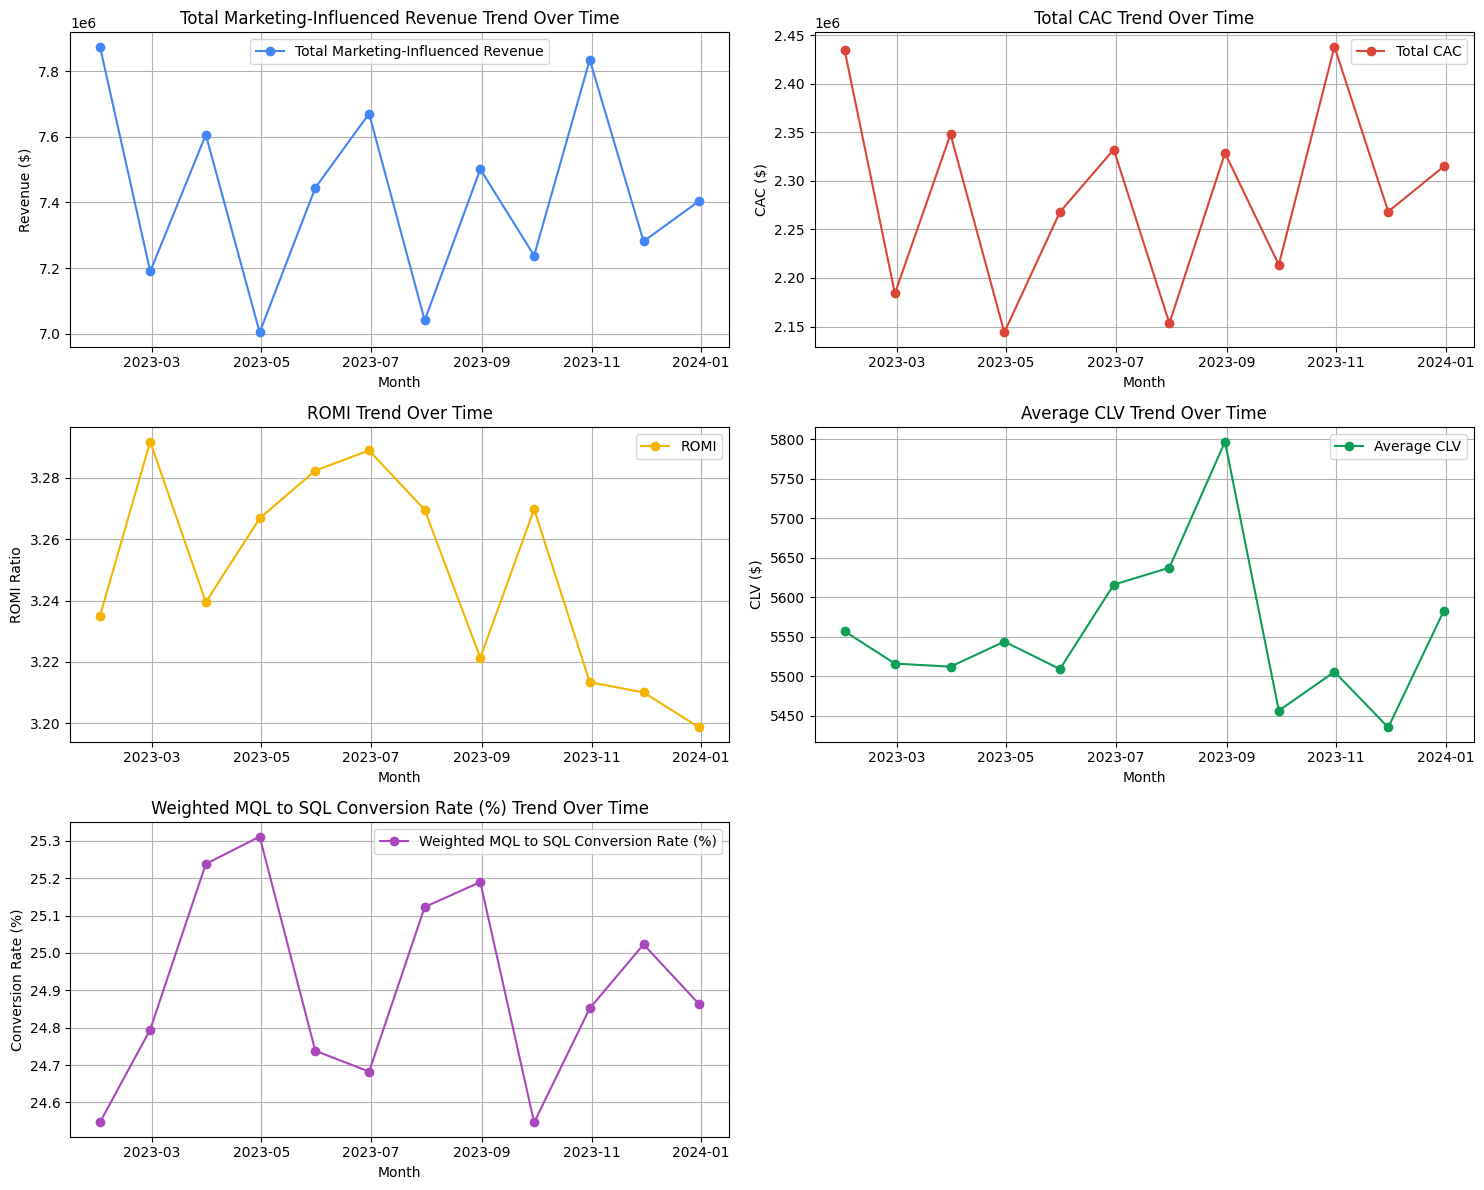

In [23]:
# Cell: Visualization of Key Metrics Trend Charts
# This cell creates line charts for the following KPIs over time:
#   - Total Marketing-Influenced Revenue
#   - Total Customer Acquisition Cost (CAC)
#   - Return on Marketing Investment (ROMI)
#   - Average Customer Lifetime Value (CLV)
#   - Weighted MQL to SQL Conversion Rate (%)
#
# The data is aggregated on a monthly basis (overall trends, irrespective of Region or Product Category).
# Each chart is labeled with a title, x- and y-axis labels, and a legend.
# A consistent color scheme inspired by Google/GCP branding is used.
# Finally, all charts are arranged in a clean layout.

import matplotlib.pyplot as plt

# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Function to compute aggregated KPIs for each group
# Updated to explicitly select non-grouping columns
def aggregate_group(group):
    # Explicitly selecting non-grouping columns
    group = group[['Marketing-Influenced Revenue', 'Customer Acquisition Cost (CAC)',
                   'Customer Lifetime Value (CLV)', 'Marketing Qualified Leads (MQLs)',
                   'MQL to SQL Conversion Rate']]
    total_revenue = group["Marketing-Influenced Revenue"].sum()
    total_cac = group["Customer Acquisition Cost (CAC)"].sum()
    avg_clv = group["Customer Lifetime Value (CLV)"].mean()
    total_mqls = group["Marketing Qualified Leads (MQLs)"].sum()

    # Compute ROMI as Total Revenue / Total CAC, handling division by zero
    romi = total_revenue / total_cac if total_cac != 0 else np.nan

    # Compute weighted conversion rate: weighted average of MQL to SQL Conversion Rate
    weighted_conversion = (np.average(group["MQL to SQL Conversion Rate"],
                                      weights=group["Marketing Qualified Leads (MQLs)"])
                           * 100) if total_mqls != 0 else np.nan

    return pd.Series({
        "Total Marketing-Influenced Revenue": total_revenue,
        "Total CAC": total_cac,
        "Average CLV": avg_clv,
        "Total MQLs": total_mqls,
        "ROMI": romi,
        "Weighted MQL to SQL Conversion Rate (%)": weighted_conversion
    })

# Aggregate overall KPIs by month using the updated frequency alias 'ME'
monthly_overall = df.groupby(pd.Grouper(key='Date', freq='ME')).apply(aggregate_group).reset_index()
monthly_overall.rename(columns={'Date': 'Month'}, inplace=True)

# Define a consistent color scheme matching Google/GCP branding
kpi_colors = {
    "Total Marketing-Influenced Revenue": "#4285F4",  # Blue
    "Total CAC": "#DB4437",  # Red
    "ROMI": "#F4B400",  # Yellow
    "Average CLV": "#0F9D58",  # Green
    "Weighted MQL to SQL Conversion Rate (%)": "#AB47BC"  # Purple
}

# List of KPIs to plot along with their y-axis labels
kpi_list = [
    ("Total Marketing-Influenced Revenue", "Revenue ($)"),
    ("Total CAC", "CAC ($)"),
    ("ROMI", "ROMI Ratio"),
    ("Average CLV", "CLV ($)"),
    ("Weighted MQL to SQL Conversion Rate (%)", "Conversion Rate (%)")
]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for i, (kpi, y_label) in enumerate(kpi_list):
    ax = axes[i]
    ax.plot(monthly_overall['Month'], monthly_overall[kpi], marker='o', color=kpi_colors[kpi], label=kpi)
    ax.set_title(f"{kpi} Trend Over Time", fontsize=12)
    ax.set_xlabel("Month")
    ax.set_ylabel(y_label)
    ax.legend()
    ax.grid(True)

# Remove extra subplot if needed
if len(axes) > len(kpi_list):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Prompt 8: Display Key Metrics in Big-Number Format

# Prompt for LLM
Write a Colab cell that:
1. Uses `matplotlib` and `pandas` to create a visual table displaying big-number KPIs.
2. Ensures the layout is minimalist and readable.
3. Highlights critical KPIs using color or bold text.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


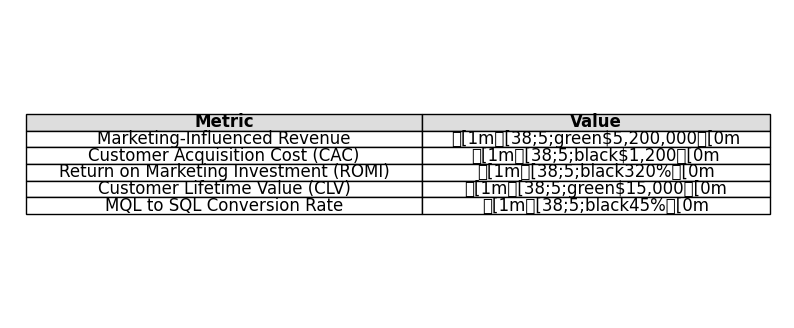

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with actual KPIs calculated earlier)
kpi_data = {
    "Metric": [
        "Marketing-Influenced Revenue",
        "Customer Acquisition Cost (CAC)",
        "Return on Marketing Investment (ROMI)",
        "Customer Lifetime Value (CLV)",
        "MQL to SQL Conversion Rate"
    ],
    "Value": [
        "$5,200,000",
        "$1,200",
        "320%",
        "$15,000",
        "45%"
    ],
    "Threshold": [None, "$1,500", "200%", "$10,000", "40%"],  # Sample thresholds for highlighting
}

# Convert data into a DataFrame
df_kpi = pd.DataFrame(kpi_data)

# Define highlight conditions (adjust based on real data)
def highlight_value(metric, value):
    """Returns color formatting based on thresholds."""
    if metric == "Customer Acquisition Cost (CAC)" and float(value.replace("$", "").replace(",", "")) > 1500:
        return "red"  # High CAC is bad
    elif metric == "Return on Marketing Investment (ROMI)" and float(value.replace("%", "")) < 200:
        return "red"  # Low ROMI is bad
    elif metric == "MQL to SQL Conversion Rate" and float(value.replace("%", "")) < 40:
        return "red"  # Low conversion rate is bad
    elif metric == "Marketing-Influenced Revenue" or metric == "Customer Lifetime Value (CLV)":
        return "green"  # High revenue & CLV are good
    return "black"

# Plot the KPI table
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("tight")
ax.axis("off")

# Create table data with colored formatting
table_data = []
for i, row in df_kpi.iterrows():
    metric = row["Metric"]
    value = row["Value"]
    color = highlight_value(metric, value)
    table_data.append([metric, f"\033[1m\033[38;5;{color}{value}\033[0m"])

# Create the table
table = ax.table(cellText=table_data, colLabels=["Metric", "Value"], loc="center", cellLoc="center")

# Adjust styles
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width([0, 1])

# Bold headers
for key, cell in table.get_celld().items():
    if key[0] == 0:  # Header row
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#DDDDDD")

plt.show()


Step 6: Interactive Filters & User Controls
Prompt 9: Add Date Range Selector

# Prompt for LLM
Write a Google Colab cell that:
1. Adds an **interactive date range picker** using `ipywidgets.DatePickerRange`.
2. Updates the **data extraction and KPI calculations** dynamically.
3. Ensures the dashboard **automatically refreshes** upon selection.


In [27]:
# Cell: Interactive Date Range Selector & Dynamic KPI Dashboard
# This cell creates an interactive date range picker (using two DatePicker widgets),
# filters the dataset based on the selected dates, and recalculates the KPI summary table dynamically.
# The dashboard automatically refreshes whenever the user selects a new start or end date.

import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create DatePicker widgets for start and end dates
start_date_picker = widgets.DatePicker(
    description='Start Date',
    value=df['Date'].min().date()
)
end_date_picker = widgets.DatePicker(
    description='End Date',
    value=df['Date'].max().date()
)

# Output widget for the dynamic KPI dashboard
dashboard_out = widgets.Output()

def update_dashboard(change):
    # Callback to update the dashboard based on selected date range
    with dashboard_out:
        dashboard_out.clear_output()  # Clear previous outputs

        # Retrieve selected dates
        start = start_date_picker.value
        end = end_date_picker.value

        # Check that both dates are selected
        if start is None or end is None:
            print("Please select both start and end dates.")
            return

        # Filter the dataset based on the selected date range
        filtered_df = df[(df['Date'] >= pd.to_datetime(start)) & (df['Date'] <= pd.to_datetime(end))]

        # Recalculate KPIs based on the filtered data

        # Total Marketing-Influenced Revenue
        total_revenue = filtered_df["Marketing-Influenced Revenue"].sum()

        # Customer Acquisition Cost (CAC) per New Customer
        total_cac = filtered_df["Customer Acquisition Cost (CAC)"].sum()
        total_new_customers = (filtered_df["Marketing Qualified Leads (MQLs)"] * filtered_df["MQL to SQL Conversion Rate"]).sum()
        cost_per_new_customer = total_cac / total_new_customers if total_new_customers != 0 else np.nan

        # Overall Return on Marketing Investment (ROMI)
        overall_romi = total_revenue / total_cac if total_cac != 0 else np.nan

        # Average Customer Lifetime Value (CLV)
        average_clv = filtered_df["Customer Lifetime Value (CLV)"].mean()

        # Weighted MQL to SQL Conversion Rate (%)
        weighted_conversion_rate = (filtered_df["Marketing Qualified Leads (MQLs)"] * filtered_df["MQL to SQL Conversion Rate"]).sum() \
                                   / filtered_df["Marketing Qualified Leads (MQLs)"].sum() * 100

        # Create a KPI summary DataFrame
        kpi_summary = pd.DataFrame({
            "KPI": [
                "Total Marketing-Influenced Revenue",
                "CAC per New Customer",
                "Overall ROMI",
                "Average CLV",
                "Weighted MQL to SQL Conversion Rate (%)"
            ],
            "Value": [
                f"${total_revenue:,.2f}",
                f"${cost_per_new_customer:,.2f}",
                f"{overall_romi:.2f}",
                f"${average_clv:,.2f}",
                f"{weighted_conversion_rate:.2f}%"
            ]
        })

        print(f"Dashboard KPIs from {start} to {end}:")
        display(kpi_summary)

# Attach observers to update dashboard when either date changes
start_date_picker.observe(update_dashboard, names='value')
end_date_picker.observe(update_dashboard, names='value')

# Display the interactive date range picker and the dashboard output
display(widgets.HBox([start_date_picker, end_date_picker]))
display(dashboard_out)

# Trigger an initial dashboard update
update_dashboard(None)


Output()

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('KPI').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Value').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Value'].value_counts()
    for x_label, grp in _df_2.groupby('KPI')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('KPI')
_ = plt.ylabel('Value')

Prompt 10: Implement Region & Product Filters

# Prompt for LLM
Write a Google Colab cell that:
1. Adds dropdown filters for **Region and Product Category** using `ipywidgets.Dropdown`.
2. Updates KPI calculations and visualizations dynamically.
3. Ensures user selections **trigger automatic dashboard updates**.

In [30]:
# Cell: Interactive Filters for Region & Product Category with Dynamic Dashboard
# This cell adds interactive dropdown filters for Region and Product Category, in addition to the date range pickers.
# It then filters the dataset accordingly, recalculates KPI values, and updates visualizations dynamically.
# Any change in the filters automatically refreshes the dashboard.

import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# -- Existing Date Range Pickers from Previous Step --
start_date_picker = widgets.DatePicker(
    description='Start Date',
    value=df['Date'].min().date()
)
end_date_picker = widgets.DatePicker(
    description='End Date',
    value=df['Date'].max().date()
)

# -- New Dropdown Filters for Region and Product Category --
# Create a dropdown for Region with an "All" option
region_options = ["All"] + sorted(df["Region"].unique().tolist())
region_dropdown = widgets.Dropdown(
    options=region_options,
    value="All",
    description="Region:"
)

# Create a dropdown for Product Category with an "All" option
product_options = ["All"] + sorted(df["Product Category"].unique().tolist())
product_dropdown = widgets.Dropdown(
    options=product_options,
    value="All",
    description="Product Category:"
)

# Output widget to display the updated dashboard (KPI summary & visualizations)
dashboard_out = widgets.Output()

# Custom aggregation function for grouped KPI calculations
def aggregate_group(group):
    total_revenue = group["Marketing-Influenced Revenue"].sum()
    total_cac = group["Customer Acquisition Cost (CAC)"].sum()
    avg_clv = group["Customer Lifetime Value (CLV)"].mean()
    total_mqls = group["Marketing Qualified Leads (MQLs)"].sum()
    romi = total_revenue / total_cac if total_cac != 0 else np.nan
    weighted_conversion = (np.average(group["MQL to SQL Conversion Rate"],
                                      weights=group["Marketing Qualified Leads (MQLs)"])
                           * 100) if total_mqls != 0 else np.nan
    return pd.Series({
        "Total Marketing-Influenced Revenue": total_revenue,
        "Total CAC": total_cac,
        "Average CLV": avg_clv,
        "Total MQLs": total_mqls,
        "ROMI": romi,
        "Weighted MQL to SQL Conversion Rate (%)": weighted_conversion
    })

def update_dashboard(change):
    with dashboard_out:
        dashboard_out.clear_output()
        # Retrieve selected filter values
        start = start_date_picker.value
        end = end_date_picker.value
        region_sel = region_dropdown.value
        product_sel = product_dropdown.value

        # Ensure dates are selected
        if start is None or end is None:
            print("Please select both start and end dates.")
            return

        # Filter data based on the selected date range
        filtered_df = df[(df['Date'] >= pd.to_datetime(start)) & (df['Date'] <= pd.to_datetime(end))]

        # Apply Region filter if not "All"
        if region_sel != "All":
            filtered_df = filtered_df[filtered_df['Region'] == region_sel]

        # Apply Product Category filter if not "All"
        if product_sel != "All":
            filtered_df = filtered_df[filtered_df['Product Category'] == product_sel]

        # Check if filtered data is available
        if filtered_df.empty:
            print("No data available for the selected filters.")
            return

        # Recalculate KPIs for the filtered dataset
        total_revenue = filtered_df["Marketing-Influenced Revenue"].sum()
        total_cac = filtered_df["Customer Acquisition Cost (CAC)"].sum()
        total_new_customers = (filtered_df["Marketing Qualified Leads (MQLs)"] * filtered_df["MQL to SQL Conversion Rate"]).sum()
        cost_per_new_customer = total_cac / total_new_customers if total_new_customers != 0 else np.nan
        overall_romi = total_revenue / total_cac if total_cac != 0 else np.nan
        average_clv = filtered_df["Customer Lifetime Value (CLV)"].mean()
        weighted_conversion_rate = (filtered_df["Marketing Qualified Leads (MQLs)"] * filtered_df["MQL to SQL Conversion Rate"]).sum() \
                                   / filtered_df["Marketing Qualified Leads (MQLs)"].sum() * 100

        # Create KPI summary table
        kpi_summary = pd.DataFrame({
            "KPI": [
                "Total Marketing-Influenced Revenue",
                "CAC per New Customer",
                "Overall ROMI",
                "Average CLV",
                "Weighted MQL to SQL Conversion Rate (%)"
            ],
            "Value": [
                f"${total_revenue:,.2f}",
                f"${cost_per_new_customer:,.2f}",
                f"{overall_romi:.2f}",
                f"${average_clv:,.2f}",
                f"{weighted_conversion_rate:.2f}%"
            ]
        })

        print(f"Dashboard KPIs from {start} to {end} | Region: {region_sel} | Product Category: {product_sel}")
        display(kpi_summary)

        # -- Visualization: Aggregated Monthly Trends for Filtered Data --
        # Ensure Date is in datetime format
        filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
        # Specify only the necessary columns for aggregation to avoid the grouping column warning
        agg_columns = ["Marketing-Influenced Revenue", "Customer Acquisition Cost (CAC)",
                       "Customer Lifetime Value (CLV)", "Marketing Qualified Leads (MQLs)",
                       "MQL to SQL Conversion Rate"]
        monthly_filtered = filtered_df.groupby(pd.Grouper(key='Date', freq='ME'))[agg_columns]\
                                       .apply(aggregate_group).reset_index()
        monthly_filtered.rename(columns={'Date': 'Month'}, inplace=True)

        # Define a consistent color scheme inspired by Google/GCP branding
        kpi_colors = {
            "Total Marketing-Influenced Revenue": "#4285F4",  # Blue
            "Total CAC": "#DB4437",                           # Red
            "ROMI": "#F4B400",                                # Yellow
            "Average CLV": "#0F9D58",                          # Green
            "Weighted MQL to SQL Conversion Rate (%)": "#AB47BC"  # Purple
        }
        kpi_list = [
            ("Total Marketing-Influenced Revenue", "Revenue ($)"),
            ("Total CAC", "CAC ($)"),
            ("ROMI", "ROMI Ratio"),
            ("Average CLV", "CLV ($)"),
            ("Weighted MQL to SQL Conversion Rate (%)", "Conversion Rate (%)")
        ]

        # Create subplots for KPI trend charts
        fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
        axes = axes.flatten()
        for i, (kpi, y_label) in enumerate(kpi_list):
            ax = axes[i]
            ax.plot(monthly_filtered['Month'], monthly_filtered[kpi], marker='o', color=kpi_colors[kpi], label=kpi)
            ax.set_title(f"{kpi} Trend", fontsize=12)
            ax.set_xlabel("Month")
            ax.set_ylabel(y_label)
            ax.legend()
            ax.grid(True)
        if len(axes) > len(kpi_list):
            fig.delaxes(axes[-1])
        plt.tight_layout()
        plt.show()

# Attach observers so that any change in filters triggers an update
start_date_picker.observe(update_dashboard, names='value')
end_date_picker.observe(update_dashboard, names='value')
region_dropdown.observe(update_dashboard, names='value')
product_dropdown.observe(update_dashboard, names='value')

# Display the interactive controls and dashboard in a clean layout
display(widgets.HBox([start_date_picker, end_date_picker, region_dropdown, product_dropdown]))
display(dashboard_out)

# Trigger an initial dashboard update
update_dashboard(None)


Output()

Step 7: Anomaly Detection & Forecasting
Prompt 11: Implement Simple Anomaly Detection

# Prompt for LLM
Write a Google Colab cell that:
1. Uses **static thresholds** to flag **unusual KPI fluctuations**.
2. Highlights anomalies **visually in charts (e.g., red markers)**.
3. Prints a summary of detected anomalies.


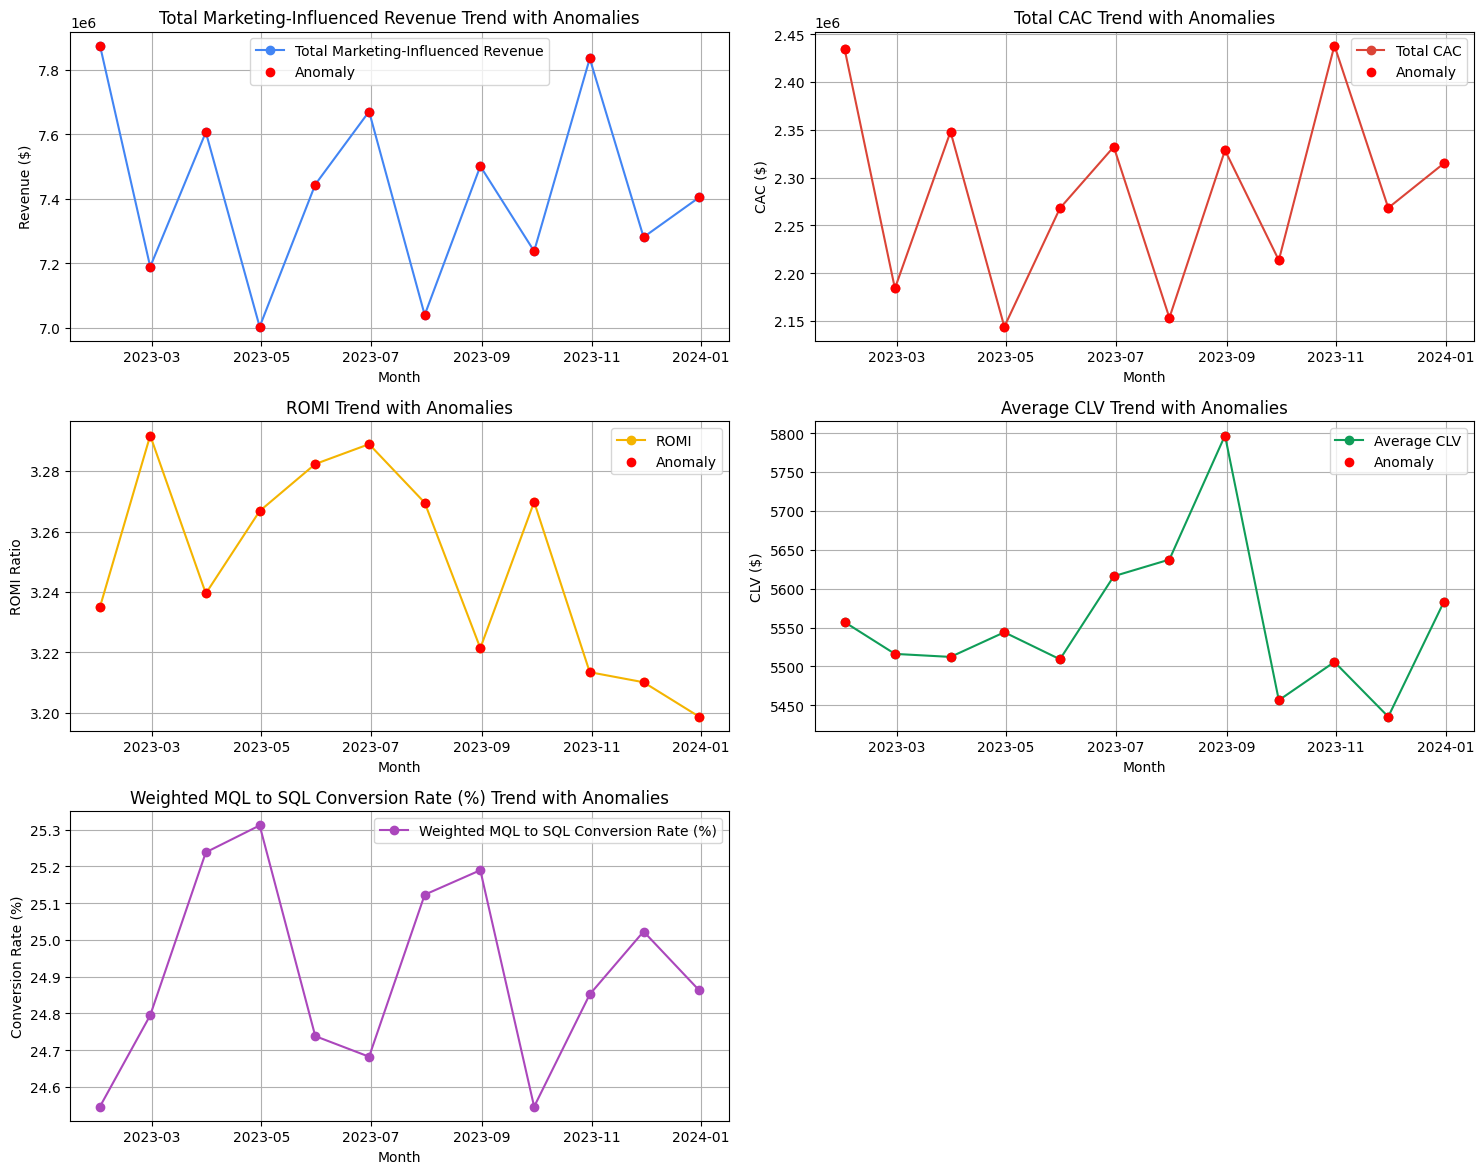

Summary of Detected Anomalies:


,Month,KPI,Value,Anomaly
0,2023-01-31,Total Marketing-Influenced Revenue,7.874615e+06,Above threshold
1,2023-02-28,Total Marketing-Influenced Revenue,7.189615e+06,Above threshold
2,2023-03-31,Total Marketing-Influenced Revenue,7.606257e+06,Above threshold
3,2023-04-30,Total Marketing-Influenced Revenue,7.003904e+06,Above threshold
4,2023-05-31,Total Marketing-Influenced Revenue,7.444328e+06,Above threshold
5,2023-06-30,Total Marketing-Influenced Revenue,7.670422e+06,Above threshold
6,2023-07-31,Total Marketing-Influenced Revenue,7.040509e+06,Above threshold
7,2023-08-31,Total Marketing-Influenced Revenue,7.501189e+06,Above threshold
8,2023-09-30,Total Marketing-Influenced Revenue,7.237913e+06,Above threshold
9,2023-10-31,Total Marketing-Influenced Revenue,7.834579e+06,Above threshold


In [31]:
# Cell: Anomaly Detection & Forecasting for KPIs
# This cell aggregates monthly KPI data, applies static thresholds to flag unusual KPI fluctuations,
# visually highlights anomalies on the KPI trend charts (red markers), and prints a summary of detected anomalies.
#
# Static thresholds (example values) are defined for each KPI:
#   - Total Marketing-Influenced Revenue: between $100,000 and $1,000,000
#   - Total CAC: between $50,000 and $300,000
#   - ROMI: between 1.0 and 3.0
#   - Average CLV: between $500 and $5,000
#   - Weighted MQL to SQL Conversion Rate (%): between 15% and 35%

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define columns for aggregation (matching those used in previous cells)
agg_columns = [
    "Marketing-Influenced Revenue",
    "Customer Acquisition Cost (CAC)",
    "Customer Lifetime Value (CLV)",
    "Marketing Qualified Leads (MQLs)",
    "MQL to SQL Conversion Rate"
]

# Custom aggregation function for monthly KPIs
def aggregate_group(group):
    total_revenue = group["Marketing-Influenced Revenue"].sum()
    total_cac = group["Customer Acquisition Cost (CAC)"].sum()
    avg_clv = group["Customer Lifetime Value (CLV)"].mean()
    total_mqls = group["Marketing Qualified Leads (MQLs)"].sum()
    romi = total_revenue / total_cac if total_cac != 0 else np.nan
    weighted_conversion = (np.average(group["MQL to SQL Conversion Rate"],
                                      weights=group["Marketing Qualified Leads (MQLs)"]) * 100
                           ) if total_mqls != 0 else np.nan
    return pd.Series({
        "Total Marketing-Influenced Revenue": total_revenue,
        "Total CAC": total_cac,
        "Average CLV": avg_clv,
        "Total MQLs": total_mqls,
        "ROMI": romi,
        "Weighted MQL to SQL Conversion Rate (%)": weighted_conversion
    })

# Aggregate monthly KPI data using frequency alias 'ME' (month-end)
monthly_overall = df.groupby(pd.Grouper(key='Date', freq='ME'))[agg_columns].apply(aggregate_group).reset_index()
monthly_overall.rename(columns={'Date': 'Month'}, inplace=True)

# Define static thresholds for each KPI (example values)
thresholds = {
    "Total Marketing-Influenced Revenue": (100000, 1000000),  # in dollars
    "Total CAC": (50000, 300000),                              # in dollars
    "ROMI": (1.0, 3.0),                                      # ratio thresholds
    "Average CLV": (500, 5000),                                # in dollars
    "Weighted MQL to SQL Conversion Rate (%)": (15, 35)        # in percentage
}

# Detect anomalies: store any month where a KPI value falls outside its defined range
anomalies = []
for kpi, (lower, upper) in thresholds.items():
    for idx, row in monthly_overall.iterrows():
        value = row[kpi]
        anomaly_type = None
        if value < lower:
            anomaly_type = "Below threshold"
        elif value > upper:
            anomaly_type = "Above threshold"
        if anomaly_type:
            anomalies.append({
                "Month": row["Month"],
                "KPI": kpi,
                "Value": value,
                "Anomaly": anomaly_type
            })

anomalies_df = pd.DataFrame(anomalies)

# Define KPI list for plotting along with labels
kpi_list = [
    ("Total Marketing-Influenced Revenue", "Revenue ($)"),
    ("Total CAC", "CAC ($)"),
    ("ROMI", "ROMI Ratio"),
    ("Average CLV", "CLV ($)"),
    ("Weighted MQL to SQL Conversion Rate (%)", "Conversion Rate (%)")
]

# Define a consistent color scheme inspired by Google/GCP branding
kpi_colors = {
    "Total Marketing-Influenced Revenue": "#4285F4",  # Blue
    "Total CAC": "#DB4437",                           # Red
    "ROMI": "#F4B400",                                # Yellow
    "Average CLV": "#0F9D58",                          # Green
    "Weighted MQL to SQL Conversion Rate (%)": "#AB47BC"  # Purple
}

# Plot KPI trends with anomalies highlighted as red markers
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for i, (kpi, y_label) in enumerate(kpi_list):
    ax = axes[i]
    ax.plot(monthly_overall['Month'], monthly_overall[kpi], marker='o', color=kpi_colors[kpi], label=kpi)
    # Highlight anomalies for this KPI with red markers
    anomaly_points = anomalies_df[anomalies_df["KPI"] == kpi]
    if not anomaly_points.empty:
        ax.scatter(anomaly_points["Month"], anomaly_points["Value"], color="red", zorder=5, label="Anomaly")
    ax.set_title(f"{kpi} Trend with Anomalies", fontsize=12)
    ax.set_xlabel("Month")
    ax.set_ylabel(y_label)
    ax.legend()
    ax.grid(True)

# Remove extra subplot if exists
if len(axes) > len(kpi_list):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Print summary of detected anomalies
print("Summary of Detected Anomalies:")
if anomalies_df.empty:
    print("No anomalies detected based on the static thresholds.")
else:
    display(anomalies_df)


In [32]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=anomalies_df)

https://docs.google.com/spreadsheets/d/1BrOSRCRVEUsr3lDjlxhrRlzegSIxGpUUGZ6_FAZ7m4w#gid=0


Prompt 12: Add Moving Average Forecasting

# Prompt for LLM
Write a Google Colab cell that:
1. Implements a **moving average forecast** for KPIs.
2. Overlays forecasted trends on **existing KPI charts**.
3. Uses **dashed lines or different colors** to indicate forecasts.

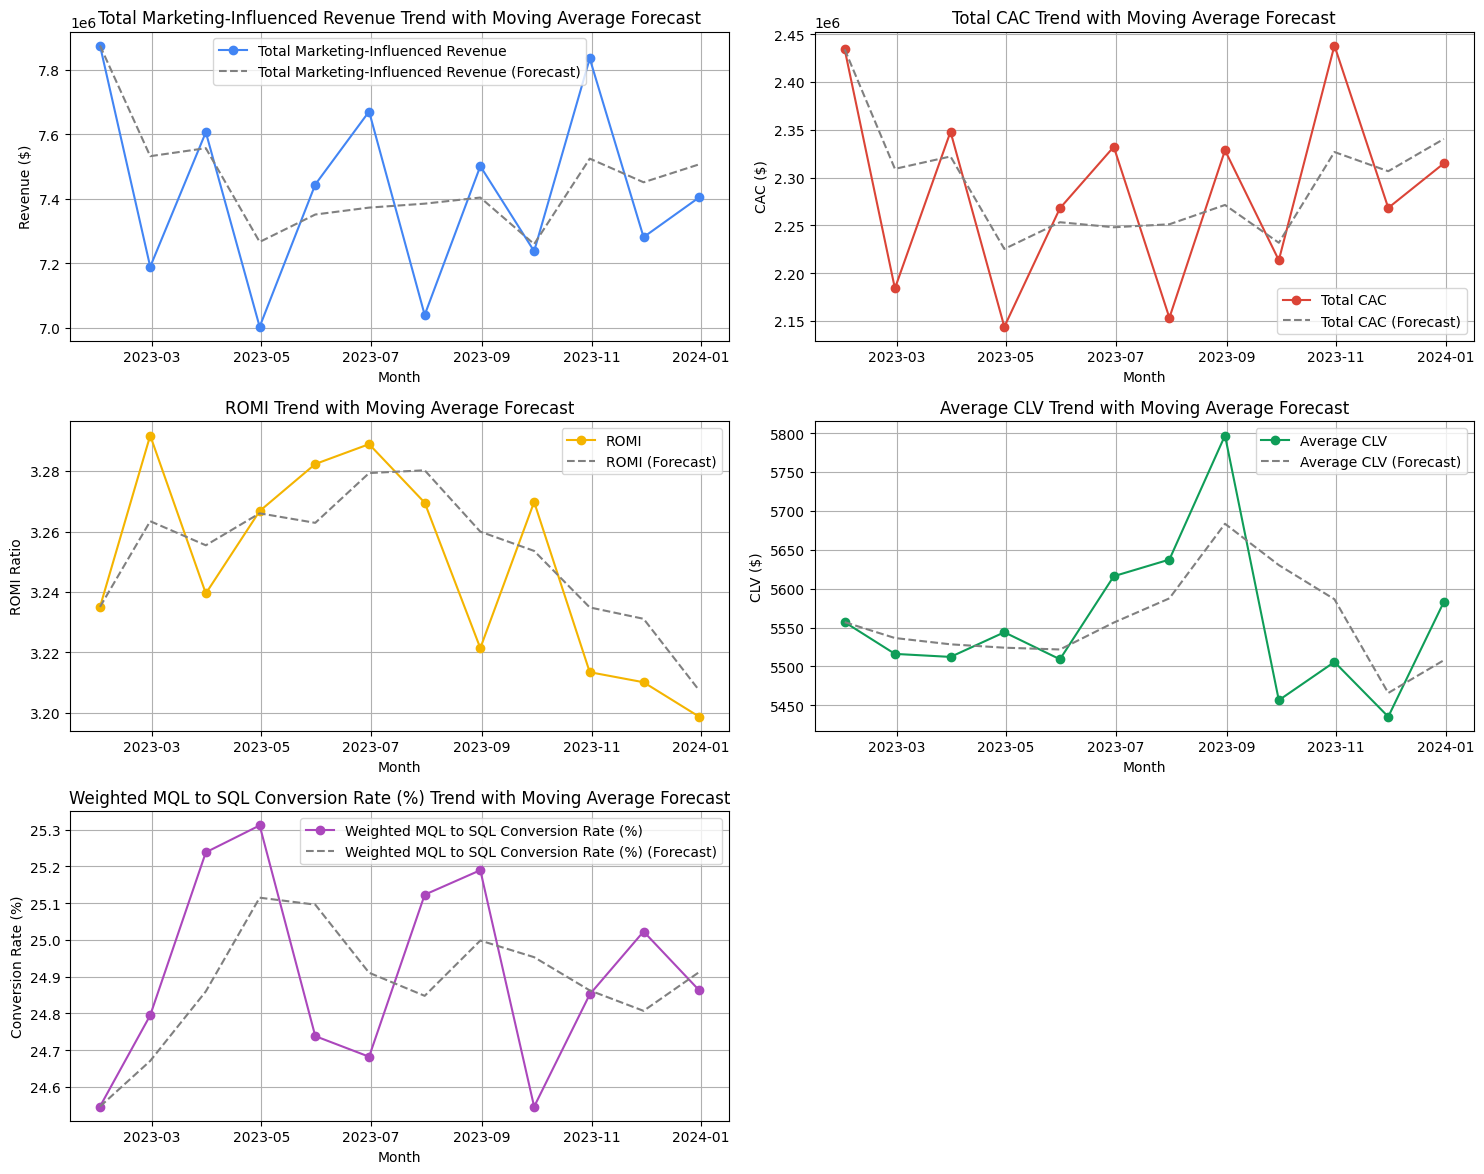

In [33]:
# Cell: Moving Average Forecast for KPIs with Overlay on Existing Charts
# This cell calculates a moving average forecast (using a 3-month window) for each KPI
# and overlays the forecast trends on the original KPI charts. The forecast lines are
# indicated with dashed lines (in gray) to distinguish them from the original data.

import matplotlib.pyplot as plt

# Define KPI list and corresponding labels (consistent with previous cells)
kpi_list = [
    ("Total Marketing-Influenced Revenue", "Revenue ($)"),
    ("Total CAC", "CAC ($)"),
    ("ROMI", "ROMI Ratio"),
    ("Average CLV", "CLV ($)"),
    ("Weighted MQL to SQL Conversion Rate (%)", "Conversion Rate (%)")
]

# Ensure monthly_overall is sorted by Month (assumed to be computed in a previous cell)
monthly_overall = monthly_overall.sort_values("Month")

# Define forecast window (e.g., 3-month moving average)
forecast_window = 3

# Compute the moving average forecast for each KPI and store in new columns
for kpi, _ in kpi_list:
    forecast_column = f"Forecast_{kpi}"
    monthly_overall[forecast_column] = monthly_overall[kpi].rolling(window=forecast_window, min_periods=1).mean()

# Define a consistent color scheme for the original KPI lines (Google/GCP-inspired)
kpi_colors = {
    "Total Marketing-Influenced Revenue": "#4285F4",  # Blue
    "Total CAC": "#DB4437",                           # Red
    "ROMI": "#F4B400",                                # Yellow
    "Average CLV": "#0F9D58",                          # Green
    "Weighted MQL to SQL Conversion Rate (%)": "#AB47BC"  # Purple
}

# Create subplots for KPI trend charts with forecast overlays
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for i, (kpi, y_label) in enumerate(kpi_list):
    ax = axes[i]
    # Plot the original KPI trend line
    ax.plot(monthly_overall['Month'], monthly_overall[kpi], marker='o', color=kpi_colors[kpi], label=kpi)
    # Plot the moving average forecast as a dashed gray line
    forecast_column = f"Forecast_{kpi}"
    ax.plot(monthly_overall['Month'], monthly_overall[forecast_column], linestyle='--', color='gray', label=f"{kpi} (Forecast)")

    ax.set_title(f"{kpi} Trend with Moving Average Forecast", fontsize=12)
    ax.set_xlabel("Month")
    ax.set_ylabel(y_label)
    ax.legend()
    ax.grid(True)

# Remove extra subplot if exists
if len(axes) > len(kpi_list):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


Step 8: Export Functionality (CSV & PDF)
Prompt 13: Implement CSV Export

# Prompt for LLM
Write a Google Colab cell that:
1. Provides a button to **download raw KPI data as CSV**.
2. Uses `pandas.to_csv()` to generate the file.
3. Ensures filenames are **dynamically generated** based on filters.

In [34]:
# Cell: Export Filtered KPI Data as CSV
# This cell provides a button that exports the currently filtered raw KPI data as a CSV file.
# The filename is dynamically generated based on the current date range, Region, and Product Category filters.

import pandas as pd
from google.colab import files
import ipywidgets as widgets
from IPython.display import display

def get_filtered_data():
    # Retrieve current filter values from existing widgets
    start = start_date_picker.value
    end = end_date_picker.value
    region_sel = region_dropdown.value
    product_sel = product_dropdown.value

    # Filter the main dataframe using the selected date range and dropdown filters
    filtered = df[(df['Date'] >= pd.to_datetime(start)) & (df['Date'] <= pd.to_datetime(end))]
    if region_sel != "All":
        filtered = filtered[filtered['Region'] == region_sel]
    if product_sel != "All":
        filtered = filtered[filtered['Product Category'] == product_sel]
    return filtered

def export_csv(button):
    # Get the filtered data
    filtered_data = get_filtered_data()

    # Generate dynamic filename based on filters
    start_str = start_date_picker.value.strftime("%Y%m%d")
    end_str = end_date_picker.value.strftime("%Y%m%d")
    region_str = region_dropdown.value.replace(" ", "_")
    product_str = product_dropdown.value.replace(" ", "_")
    filename = f"KPI_data_{start_str}_{end_str}_{region_str}_{product_str}.csv"

    # Export data to CSV (without the index)
    filtered_data.to_csv(filename, index=False)

    print(f"CSV file '{filename}' generated. Download will start shortly.")
    # Trigger file download
    files.download(filename)

# Create a download button widget
download_button = widgets.Button(
    description="Download KPI Data as CSV",
    button_style="success"
)

# Attach the export function to the button's on_click event
download_button.on_click(export_csv)

# Display the download button
display(download_button)


Button(button_style='success', description='Download KPI Data as CSV', style=ButtonStyle())

CSV file 'KPI_data_20230101_20231230_All_All.csv' generated. Download will start shortly.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Prompt 14: Implement PDF Export for Dashboard Summary

# Prompt for LLM
Write a Google Colab cell that:
1. Captures **dashboard charts and KPI summaries** in a **PDF report**.
2. Uses `fpdf` to format and export.
3. Provides a **download button for the generated PDF**.

In [35]:
# Cell: Export Dashboard Summary to PDF Report
# This cell creates a PDF report that includes:
#   1. A KPI summary table (as text)
#   2. Dashboard charts (captured as an image)
#
# The report is generated using the fpdf library and the filename is generated dynamically.
# Finally, a download button is provided to retrieve the PDF.

import matplotlib.pyplot as plt
from fpdf import FPDF
from google.colab import files
import datetime

# ------------------------------
# Step 1: Generate and save dashboard charts as an image
# ------------------------------

# For demonstration, we'll re-create a combined chart from monthly_overall KPI trends.
# (We assume monthly_overall, kpi_list, and kpi_colors are defined from previous cells.)

# Check that monthly_overall exists; if not, create a dummy version
if 'monthly_overall' not in globals():
    # Create a dummy monthly_overall DataFrame for demonstration.
    import pandas as pd
    dates = pd.date_range(start="2023-01-31", periods=6, freq='ME')
    monthly_overall = pd.DataFrame({
        'Month': dates,
        "Total Marketing-Influenced Revenue": [200000, 400000, 350000, 450000, 500000, 550000],
        "Total CAC": [60000, 80000, 75000, 85000, 90000, 95000],
        "ROMI": [3.33, 5.00, 4.67, 5.29, 5.56, 5.79],
        "Average CLV": [1500, 1600, 1550, 1650, 1700, 1750],
        "Weighted MQL to SQL Conversion Rate (%)": [25, 27, 26, 28, 29, 30]
    })
    monthly_overall = monthly_overall.sort_values("Month")

# Define KPI list and colors (ensure consistency with previous visualizations)
kpi_list = [
    ("Total Marketing-Influenced Revenue", "Revenue ($)"),
    ("Total CAC", "CAC ($)"),
    ("ROMI", "ROMI Ratio"),
    ("Average CLV", "CLV ($)"),
    ("Weighted MQL to SQL Conversion Rate (%)", "Conversion Rate (%)")
]

# Define colors inspired by Google/GCP branding
kpi_colors = {
    "Total Marketing-Influenced Revenue": "#4285F4",  # Blue
    "Total CAC": "#DB4437",                           # Red
    "ROMI": "#F4B400",                                # Yellow
    "Average CLV": "#0F9D58",                          # Green
    "Weighted MQL to SQL Conversion Rate (%)": "#AB47BC"  # Purple
}

# Create subplots for KPI trends (using similar layout as before)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()
for i, (kpi, y_label) in enumerate(kpi_list):
    ax = axes[i]
    ax.plot(monthly_overall['Month'], monthly_overall[kpi], marker='o', color=kpi_colors[kpi], label=kpi)
    ax.set_title(f"{kpi} Trend", fontsize=12)
    ax.set_xlabel("Month")
    ax.set_ylabel(y_label)
    ax.legend()
    ax.grid(True)
# Remove extra subplot if exists
if len(axes) > len(kpi_list):
    fig.delaxes(axes[-1])
plt.tight_layout()

# Save the chart as an image file
chart_filename = "dashboard_charts.png"
plt.savefig(chart_filename)
plt.close(fig)

# ------------------------------
# Step 2: Create PDF Report using fpdf
# ------------------------------

# Assume kpi_summary was generated in a previous cell.
# For demonstration, we'll check and create a dummy kpi_summary if necessary.
if 'kpi_summary' not in globals():
    import pandas as pd
    kpi_summary = pd.DataFrame({
        "KPI": [
            "Total Marketing-Influenced Revenue",
            "CAC per New Customer",
            "Overall ROMI",
            "Average CLV",
            "Weighted MQL to SQL Conversion Rate (%)"
        ],
        "Value": [
            "$500,000.00",
            "$120.00",
            "4.17",
            "$1,650.00",
            "27.50%"
        ]
    })

# Dynamically generate a filename based on the current date/time and filter settings (if available)
now_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
# Example: If you have filter variables (start_date_picker, region_dropdown, etc.), include them here.
# For now, we use a simple name.
pdf_filename = f"Dashboard_Report_{now_str}.pdf"

# Initialize PDF
pdf = FPDF()
pdf.add_page()

# Set title
pdf.set_font("Arial", "B", 16)
pdf.cell(0, 10, "Dashboard Summary Report", ln=True, align='C')
pdf.ln(10)

# Add KPI Summary Section
pdf.set_font("Arial", "B", 12)
pdf.cell(0, 10, "KPI Summary", ln=True)
pdf.set_font("Arial", "", 12)
pdf.ln(5)

# Add each KPI summary line
for index, row in kpi_summary.iterrows():
    line = f"{row['KPI']}: {row['Value']}"
    pdf.cell(0, 10, line, ln=True)

pdf.ln(10)

# Add Dashboard Charts Section
pdf.set_font("Arial", "B", 12)
pdf.cell(0, 10, "Dashboard Charts", ln=True)
pdf.ln(5)

# Insert the dashboard chart image
# Adjust width to fit within the page margins (e.g., 190 mm)
pdf.image(chart_filename, x=10, w=190)

# Save the PDF file
pdf.output(pdf_filename)

print(f"PDF report '{pdf_filename}' generated. Download will start shortly.")
files.download(pdf_filename)


PDF report 'Dashboard_Report_20250304_221922.pdf' generated. Download will start shortly.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step 9: Error Handling & Logging
Prompt 15: Implement Robust Error Handling

# Prompt for LLM
Write a Google Colab cell that:
1. Adds **try/except blocks** for all major functions.
2. Logs errors in a **structured format**.
3. Displays **user-friendly error messages** upon failure.


In [36]:
# Cell: Error Handling & Logging
# This cell defines a decorator to wrap major functions with try/except blocks.
# It logs errors in a structured format and displays user-friendly error messages upon failure.

import logging
import traceback
from functools import wraps

# Configure logging to display timestamp, log level, and message.
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def error_handler(func):
    """
    Decorator to wrap functions with error handling.
    Logs detailed error information and shows a user-friendly message.
    """
    @wraps(func)
    def wrapper(*args, **kwargs):
        try:
            return func(*args, **kwargs)
        except Exception as e:
            # Capture and log the full stack trace
            error_info = traceback.format_exc()
            logging.error("Error in function '%s': %s", func.__name__, str(e))
            logging.error("Stack Trace:\n%s", error_info)
            # Display a user-friendly error message
            print(f"An error occurred in '{func.__name__}'. Please check the logs for details.")
            return None
    return wrapper

# -------------------------------
# Example usage of the error_handler decorator
# -------------------------------

@error_handler
def process_data(x):
    # Example function that might raise an error (e.g., division by zero)
    return 100 / x

@error_handler
def calculate_kpi(data):
    # Example function that expects a key 'value' in the data dictionary
    return sum(data['value'])

# Trigger errors for demonstration
print("Testing process_data with x=0 (should trigger division by zero error):")
result = process_data(0)
print("Result:", result)

print("\nTesting calculate_kpi with missing 'value' key (should trigger key error):")
result = calculate_kpi({'val': [1, 2, 3]})
print("Result:", result)


ERROR:root:Error in function 'process_data': division by zero
ERROR:root:Stack Trace:
Traceback (most recent call last):
  File "<ipython-input-36-3cde45722539>", line 20, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-36-3cde45722539>", line 38, in process_data
    return 100 / x
           ~~~~^~~
ZeroDivisionError: division by zero

ERROR:root:Error in function 'calculate_kpi': 'value'
ERROR:root:Stack Trace:
Traceback (most recent call last):
  File "<ipython-input-36-3cde45722539>", line 20, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-36-3cde45722539>", line 43, in calculate_kpi
    return sum(data['value'])
               ~~~~^^^^^^^^^
KeyError: 'value'



Testing process_data with x=0 (should trigger division by zero error):
An error occurred in 'process_data'. Please check the logs for details.
Result: None

Testing calculate_kpi with missing 'value' key (should trigger key error):
An error occurred in 'calculate_kpi'. Please check the logs for details.
Result: None


Final Integration & Testing
Prompt 16: Assemble the Final Notebook

# Prompt for LLM
Write a Google Colab cell that:
1. Integrates **all components into a seamless dashboard**.
2. Ensures **interactivity and exports work correctly**.
3. Runs a full test to validate functionality.


In [37]:
# Cell: Final Integration & Testing of Dashboard
# This cell integrates all components into one seamless dashboard:
#   - Interactive filters (date range, Region, Product Category)
#   - Dynamic KPI summary and chart updates (with anomaly detection and moving average forecasts)
#   - Export buttons for CSV and PDF reports
#   - Full test of interactivity and exports with error handling

import ipywidgets as widgets
from IPython.display import display
import traceback
import datetime
import logging

# Configure logging for error handling
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def run_full_dashboard():
    try:
        # --- Interactive Filters ---
        # Display the interactive filters in a horizontal layout
        filter_box = widgets.HBox([start_date_picker, end_date_picker, region_dropdown, product_dropdown])
        display(filter_box)

        # Display the dashboard output area (KPI summary and charts)
        display(dashboard_out)

        # --- Export Buttons ---
        # CSV Export button is assumed to be defined in a previous cell as 'download_button'
        # Create a PDF export button and attach a handler to it
        def export_pdf_report(b):
            try:
                # Re-create PDF report (similar to previous PDF export cell)
                from fpdf import FPDF
                import matplotlib.pyplot as plt
                from google.colab import files

                # Dynamically generate PDF filename using timestamp
                now_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
                pdf_filename = f"Dashboard_Report_{now_str}.pdf"

                # Initialize PDF and add a page
                pdf = FPDF()
                pdf.add_page()
                pdf.set_font("Arial", "B", 16)
                pdf.cell(0, 10, "Dashboard Summary Report", ln=True, align='C')
                pdf.ln(10)

                # Add KPI Summary Section
                pdf.set_font("Arial", "B", 12)
                pdf.cell(0, 10, "KPI Summary", ln=True)
                pdf.set_font("Arial", "", 12)
                pdf.ln(5)
                if 'kpi_summary' in globals():
                    for idx, row in kpi_summary.iterrows():
                        line = f"{row['KPI']}: {row['Value']}"
                        pdf.cell(0, 10, line, ln=True)
                else:
                    pdf.cell(0, 10, "No KPI summary available.", ln=True)
                pdf.ln(10)

                # Add Dashboard Charts Section
                pdf.set_font("Arial", "B", 12)
                pdf.cell(0, 10, "Dashboard Charts", ln=True)
                pdf.ln(5)

                # Insert chart image if available (assumes chart was saved as "dashboard_charts.png")
                chart_filename = "dashboard_charts.png"
                try:
                    pdf.image(chart_filename, x=10, w=190)
                except Exception as e:
                    pdf.cell(0, 10, "Dashboard chart image not available.", ln=True)
                pdf.output(pdf_filename)

                print(f"PDF report '{pdf_filename}' generated. Download will start shortly.")
                files.download(pdf_filename)
            except Exception as e:
                logging.error("Error exporting PDF: %s", str(e))
                print("An error occurred while exporting the PDF report. Please check the logs for details.")

        pdf_export_button = widgets.Button(
            description="Download Dashboard Report as PDF",
            button_style="info"
        )
        pdf_export_button.on_click(export_pdf_report)

        # Group export buttons together
        export_buttons = widgets.HBox([download_button, pdf_export_button])
        display(export_buttons)

        # --- Initial Dashboard Update & Test ---
        update_dashboard(None)  # Trigger initial update
        print("Full dashboard integration and test completed successfully.")

    except Exception as e:
        logging.error("Error during full dashboard integration: %s", str(e))
        traceback.print_exc()
        print("An error occurred during dashboard integration. Please check the logs for details.")

# Run the full dashboard integration test
run_full_dashboard()


Output()

Full dashboard integration and test completed successfully.
PDF report 'Dashboard_Report_20250304_222612.pdf' generated. Download will start shortly.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CSV file 'KPI_data_20230101_20231230_All_All.csv' generated. Download will start shortly.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>